In [1]:
from lsst.daf.butler import Butler
import lsst.afw.display as afwDisplay
import matplotlib.pyplot as plt

In [2]:
repo_path = "/sdf/group/rubin/repo/ucd"
butler = Butler(repo_path,instrument='LSST-UCDCam')
registry = butler.registry

In [3]:
registry.queryCollections('*eo*')

['u/snyder18/20231117/eo_read_noise/20231205T204918Z',
 'u/snyder18/20231118/eo_bf_analysis/20231205T165817Z',
 'u/snyder18/20231118/eo_divisadero_tearing/20231201T225022Z',
 'u/snyder18/20231117/eo_dark_current/20231201T225156Z',
 'u/snyder18/20231117/eo_read_noise',
 'u/snyder18/20231118/eo_bf_analysis',
 'u/snyder18/20231118/eo_divisadero_tearing',
 'u/snyder18/20231117/eo_dark_current']

In [4]:
collections='u/snyder18/20231117/eo_read_noise'
for results in registry.queryDatasets(...,collections=collections).byParentDatasetType():
    n=results.count(exact=False)
    if n==0:
        continue
    print(results.parentDatasetType.name, n)

camera 1
raw 52868
packages 2
bias 1
ptcPlot_config 1
ptcExtract_config 1
ptcSolve_config 1
ptcIsr_config 1
ptc 1
ptcIsr_metadata 2000
cpPtcProc 2000
cpPtcExtract 2000
ptcVarMean 1
ptcNormalizedCov10 1
ptcAandBMatrices 1
ptcVarMeanLog 1
ptcVarResiduals 1
ptcCov10Mean 1
ptcACumulativeSum 1
ptcNormalizedVar 1
ptcCov01Mean 1
ptcAandBDistance 1
ptcARelativeBias 1
ptcNormalizedCov01 1
ptcPlot_metadata 1
ptcPlot_log 1
ptcExtract_metadata 1
ptcExtract_log 1
ptcSolve_metadata 1
ptcSolve_log 1
ptcIsr_log 2000
defects 1
readNoise_config 1
readNoiseFpPlots_config 1
eo_read_noise 1
readNoise_metadata 1
readNoise_log 1
read_noise_plot 1
read_noise_hist 1
readNoiseFpPlots_metadata 1
readNoiseFpPlots_log 1


In [5]:
kwargs={
"datasetType": 'bias',
"collections": collections,
"where":
"""
instrument='LSST-UCDCam' 
"""
}

datasetRefs = list(registry.queryDatasets(**kwargs))
print( f"You have {len(datasetRefs)} in this repository with the condition supplied {kwargs}")

You have 1 in this repository with the condition supplied {'datasetType': 'bias', 'collections': 'u/snyder18/20231117/eo_read_noise', 'where': "\ninstrument='LSST-UCDCam' \n"}


In [6]:
def display(exposure,title=None):
    afwDisplay.setDefaultBackend('matplotlib') 
    fig = plt.figure(figsize=(10,10))
    afw_display = afwDisplay.Display(1)
    afw_display.scale('asinh', 'zscale')
    afw_display.mtv(exposure.getImage())
    plt.title(title)
    plt.gca().axis('off')

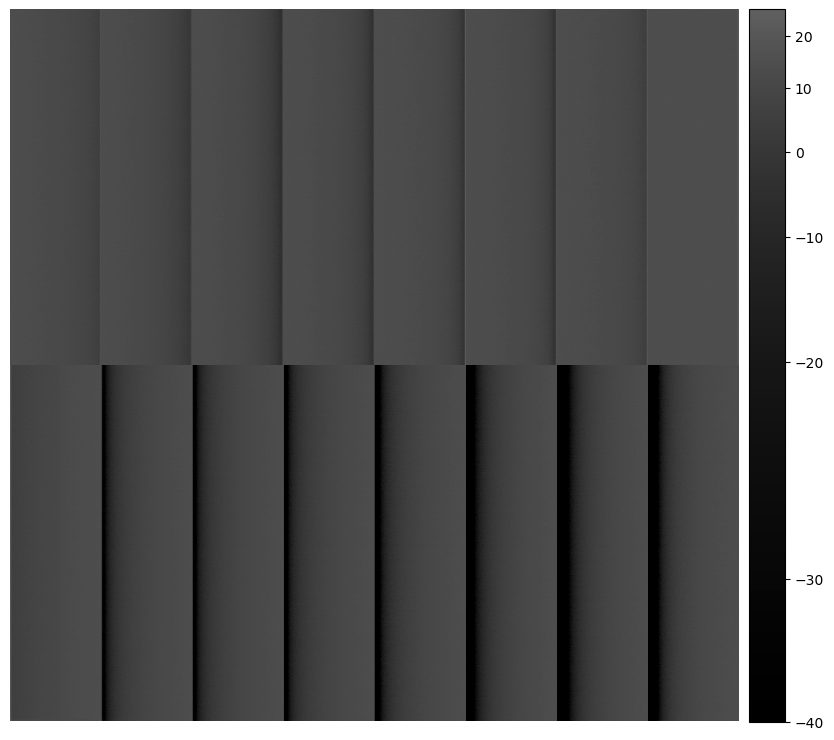

In [7]:
display(butler.get(datasetRefs[0]))

In [8]:
kwargs={
"datasetType": 'ptc',
"collections": collections,
"where":
"""
instrument='LSST-UCDCam' 
"""
}

datasetRefs = list(registry.queryDatasets(**kwargs))
print( f"You have {len(datasetRefs)} in this repository with the condition supplied {kwargs}")
ptc=butler.get(datasetRefs[0])

You have 1 in this repository with the condition supplied {'datasetType': 'ptc', 'collections': 'u/snyder18/20231117/eo_read_noise', 'where': "\ninstrument='LSST-UCDCam' \n"}


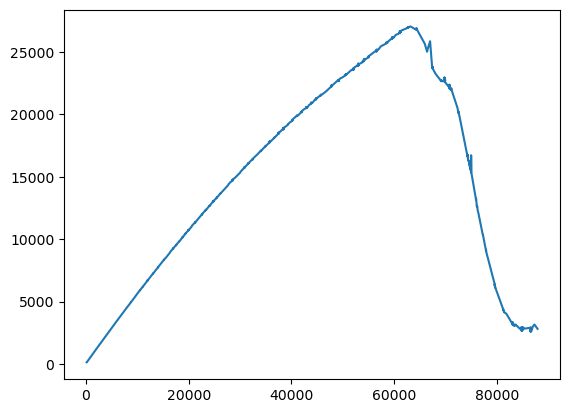

In [9]:
amp='C10'
plt.plot(ptc.rawMeans[amp],ptc.rawVars[amp])